In [80]:
# Importamos las librerías que previsiblemente necesitaremos
import pandas as pd
import numpy as np
# from src.support import obtener_df_coordenadas, buscar_lugares, obtener_servicios_municipios
# Uso de API's
# -----------------------------------------------------------------------
import requests

# Para incluir una barra de proceso en for loops
# -----------------------------------------------------------------------
from tqdm import tqdm


# Para introducir tiempo entre las llamadas
# -----------------------------------------------------------------------
from time import sleep


# Para trabajar con archivos dotenv y los tokens
# -----------------------------------------------------------------------
import os
import dotenv
dotenv.load_dotenv()

# Importamos BeautifulSoup
# ------------------------------------------------------------------------
from bs4 import BeautifulSoup 
#from src import soporte_beautifullsoup as sb

# librerias adicionales
from time import sleep
import random
import datetime

# Importar librerías para automatización de navegadores web con Selenium
# -----------------------------------------------------------------------
from selenium import webdriver  # Selenium es una herramienta para automatizar la interacción con navegadores web.
from webdriver_manager.chrome import ChromeDriverManager  # ChromeDriverManager gestiona la instalación del controlador de Chrome.
from selenium.webdriver.common.keys import Keys  # Keys es útil para simular eventos de teclado en Selenium.
from selenium.webdriver.support.ui import Select  # Select se utiliza para interactuar con elementos <select> en páginas web.
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException # Excepciones comunes de selenium que nos podemos encontrar 

# Importar librerias para las visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoramos los warnings
import warnings
warnings.filterwarnings("ignore")


# **ANÁLISIS EDA**

## **Contexto**

El presente análsiis parte de que somos una empresa organizadora de viajes, y nuestros clientes son Juan y Sara, una pareja, que quiere irse del 22 al 24 de Noviembre, de viaje para desconectar. Han pensado que quiere ir a Barcelona o a Santiago de Compostela. 

No quieren gastar mucho, por eso quieren billetes en clase turista, y quieren que nosotros les demos información sobre hoteles y actividades (les interesan las típicas actividades turisticas, pues no conocen a fondo ninguna de las dos ciudades), en base a la cual decidirán por cual destino se decantan.

En base a estas premisas, nostros, mediante escrapeo de la web de civitatis, y uso de las APIS de tripadvisor y Skyscraper (ambas de rapidapi) hemos recabado una serie de datos, con los que reaizar nuestro análisis.

## **EDA**

En primer lugar cargamos los 6 dataframes que hemos obtenido para hacer nuestro analisis.

In [81]:
# Dataframes de actividades
df_actividades_barcelona = pd.read_csv("datos/actividades_barcelona.csv")
df_actividades_santiago = pd.read_csv("datos/actividades_santiago.csv")

# Dataframes de hoteles
df_hoteles_barcelona  = pd.read_csv("datos/hoteles_barcelona.csv")
df_hoteles_santiago = pd.read_csv("datos/hoteles_santiago.csv")

# Dataframes de vuelos
df_vuelos_barcelona  = pd.read_csv("datos/vuelos_barcelona.csv")
df_vuelos_santiago = pd.read_csv("datos/vuelos_santiago.csv")




Empecemos analizando los DataFrames de actividades

In [82]:
df_actividades_barcelona.head()

,Nombre,Puntuación,Precio,Descripción,Link
0,Visita de la Sagrada Familia sin colas,8.6,55.0,Si hay un lugar que nadie puede perderse en Ba...,https://www.civitatis.com/es/barcelona/visita-...
1,Free tour por Barcelona,9.5,0.0,El free tour por Barcelona es la mejor forma d...,https://www.civitatis.com/es/barcelona/free-to...
2,Excursión a Montserrat con tren cremallera,8.4,57.0,En esta excursión a Montserrat podréis visitar...,https://www.civitatis.com/es/barcelona/excursi...
3,Visita guiada por el Parque Güell,7.7,NaN,En esta visita guiada por el Parque Güell de B...,https://www.civitatis.com/es/barcelona/visita-...
4,Sagrada Familia con subida a las torres,7.8,70.0,En esta visita a la Sagrada Familia conoceremo...,https://www.civitatis.com/es/barcelona/visita-...


In [83]:
df_actividades_santiago.head()

,Nombre,Puntuación,Precio,Descripción,Link
0,"Excursión a las Rías Baixas, isla de Arosa y C...",9.1,42,Los paisajes de las Rías Baixas cautivan a tod...,https://www.civitatis.com/es/santiago-de-compo...
1,Free tour por Santiago de Compostela,9.3,0,Recorre el centro histórico de Santiago de Com...,https://www.civitatis.com/es/santiago-de-compo...
2,Excursión a Finisterre y Costa da Morte de día...,8.7,49,Dejaos cautivar por los paisajes del cabo Fini...,https://www.civitatis.com/es/santiago-de-compo...
3,Visita guiada por la Catedral de Santiago,9.2,15,Descubrid uno de los iconos de la capital de G...,https://www.civitatis.com/es/santiago-de-compo...
4,Excursión a las Rías Baixas + Visita a una bodega,8.9,42,"Una bodega de albariño, un paseo en barco por ...",https://www.civitatis.com/es/santiago-de-compo...


In [84]:
media_barcelona = df_actividades_barcelona['Puntuación'].mean()
media_santiago = df_actividades_santiago['Puntuación'].mean()

# Crear un DataFrame con las puntuaciones medias
df_medias = pd.DataFrame({
    'Ciudad': ['Barcelona', 'Santiago'],
    'Puntuación Media': [media_barcelona, media_santiago]
})

df_medias



,Ciudad,Puntuación Media
0,Barcelona,8.890000
1,Santiago,9.236842


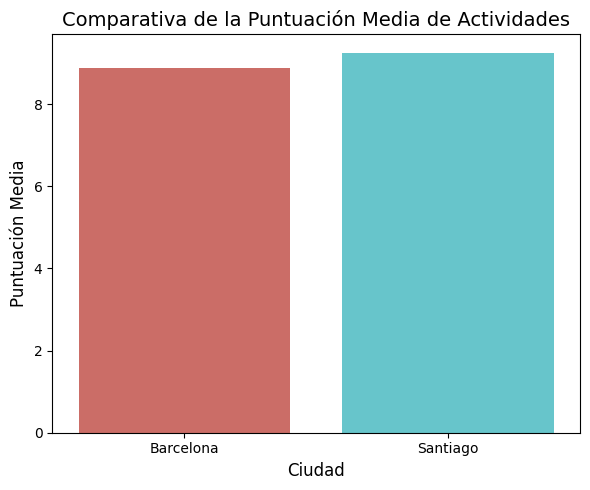

In [85]:
# Visualización con seaborn
plt.figure(figsize=(6,5))
sns.barplot(x='Ciudad', y='Puntuación Media', data=df_medias, palette="hls")

# Añadir etiquetas y título
plt.title('Comparativa de la Puntuación Media de Actividades', fontsize=14)
plt.ylabel('Puntuación Media', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

La puntuación media de las actividades de Santiago es superior a la de Barcelona

Veamos que pasa con los precios

In [86]:
# Calculamos la media de los precios en ambos dataframes
media_precio_barcelona = df_actividades_barcelona['Precio'].mean()
media_precio_santiago = df_actividades_santiago['Precio'].mean()

# Hacemos un DataFrame con la media de los precios de las actividades en ambas ciduades
df_precio_medias = pd.DataFrame({
    'Ciudad': ['Barcelona', 'Santiago'],
    'Precio Medio': [media_precio_barcelona, media_precio_santiago]
})

df_precio_medias

,Ciudad,Precio Medio
0,Barcelona,47.117647
1,Santiago,36.000000


In [87]:
diferencia_precio = media_precio_barcelona - media_precio_santiago
print("Las actividades de Barcelona son de media más caras que las de Santiago, la diferencia es: ", diferencia_precio, "euros")

Las actividades de Barcelona son de media más caras que las de Santiago, la diferencia es:  11.117647058823529 euros


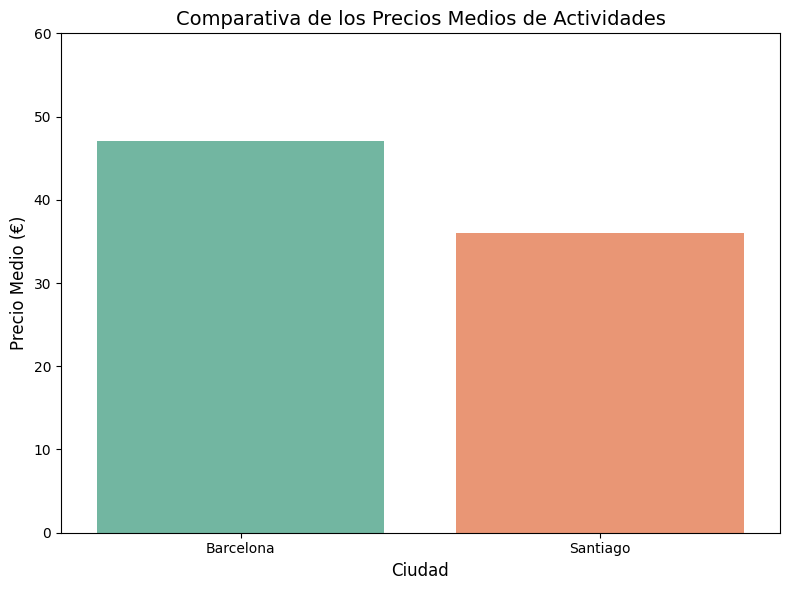

In [88]:
# Visualización de la diferencia de precios
plt.figure(figsize=(8, 6))
sns.barplot(x='Ciudad', y='Precio Medio', data=df_precio_medias, palette="Set2")

# Añadir etiquetas y título
plt.title('Comparativa de los Precios Medios de Actividades', fontsize=14)
plt.ylabel('Precio Medio (€)', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)

# Ajustar la escala del eje y
plt.ylim(0, 60)

# Ajustar el layout
plt.tight_layout()

Comparamos ahora el precio de las 5 actividades con mayor puntuación en cada ciudad

In [89]:
# Seleccionamos las 5 actividades con mayor puntuación en cada ciudad
top_5_barcelona = df_actividades_barcelona.nlargest(5, 'Puntuación')
top_5_santiago = df_actividades_santiago.nlargest(5, 'Puntuación')

# Creamos un DataFrame con las actividades de ambas ciudades y restablecemoa el índice
df_top_5_actividades = pd.concat([top_5_barcelona, top_5_santiago]).reset_index(drop=True)

df_top_5_actividades['Ciudad'] = ['Barcelona'] * 5 + ['Santiago'] * 5


df_top_5_actividades

,Nombre,Puntuación,Precio,Descripción,Link,Ciudad
0,Excursión a Montserrat + Visita a una bodega,10.0,NaN,En esta excursión a Montserrat no solo disfrut...,https://www.civitatis.com/es/barcelona/tour-ta...,Barcelona
1,Free tour de Gaudí y la Barcelona modernista,9.7,0.0,Acompañadnos a visitar el corazón de Barcelona...,https://www.civitatis.com/es/barcelona/tour-ba...,Barcelona
2,Free tour nocturno por el Barrio Gótico,9.6,0.0,En este free tour nocturno por el Barrio Gótic...,https://www.civitatis.com/es/barcelona/tour-no...,Barcelona
3,Free tour por Barcelona,9.5,0.0,El free tour por Barcelona es la mejor forma d...,https://www.civitatis.com/es/barcelona/free-to...,Barcelona
4,"Excursión a Gerona, Figueras y Cadaqués",9.4,55.0,Si estáis en Barcelona y queréis visitar lo me...,https://www.civitatis.com/es/barcelona/excursi...,Barcelona
5,"Tour por la Ciudad de la Cultura, Pazo de Riva...",10.0,28.0,En este tour por los alrededores de Santiago d...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
6,Tour en 4x4 por La Coruña y Pontevedra,9.8,129.0,Historia y naturaleza os esperan en este tour ...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
7,Tour privado por la Catedral de Santiago y su ...,9.6,65.0,En este tour privado por la Catedral de Santia...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
8,Tour de Santiago de Compostela al completo con...,9.5,45.0,"La plaza del Obradoiro, la Catedral, el Pórtic...",https://www.civitatis.com/es/santiago-de-compo...,Santiago
9,Free tour por el Santiago oculto,9.5,0.0,Dejaos sorprender en este free tour por el San...,https://www.civitatis.com/es/santiago-de-compo...,Santiago


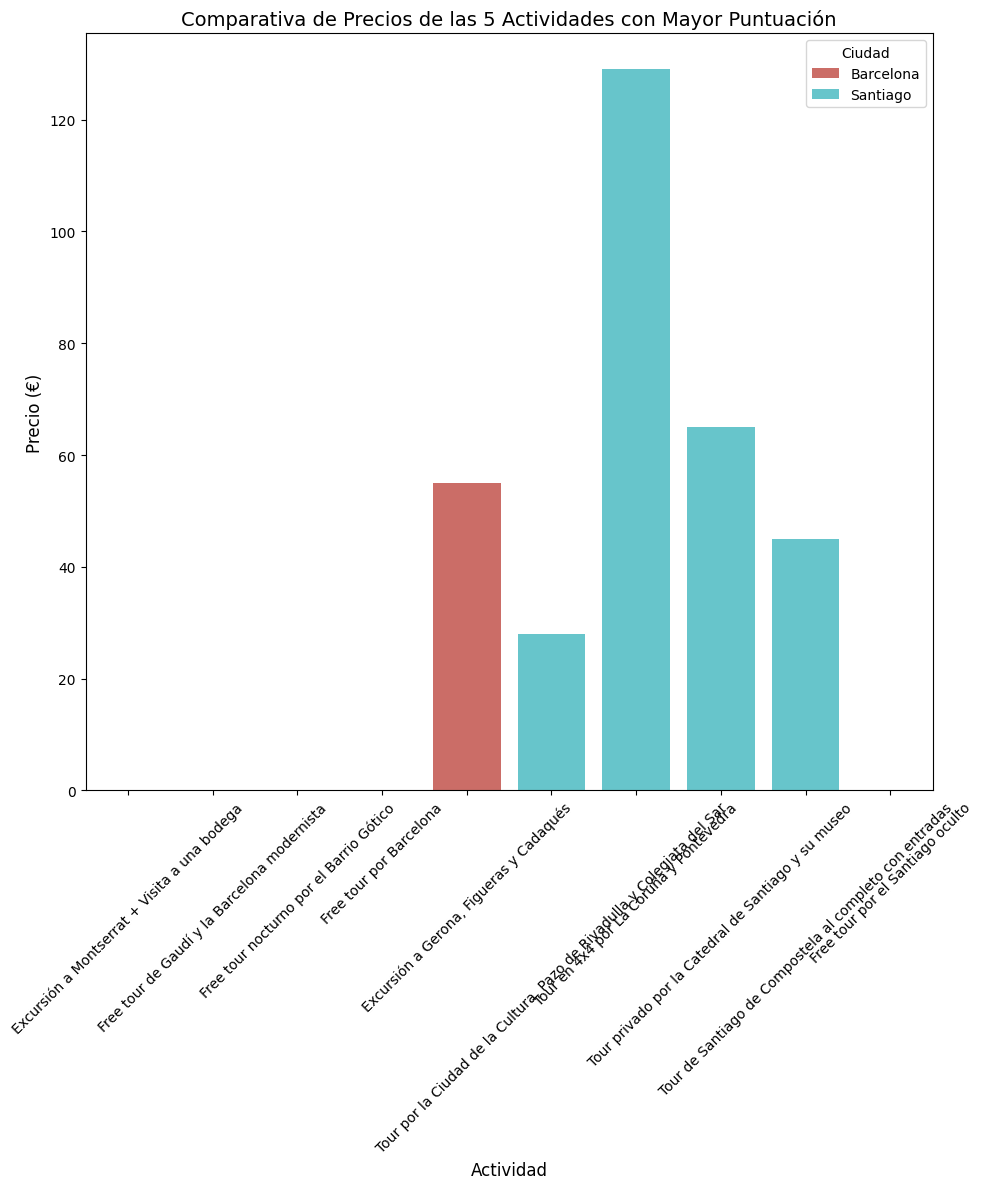

In [90]:
# Visualización de la comparativa de precios de las 5 actividades con mayor puntuación
plt.figure(figsize=(10, 12))
sns.barplot(x='Nombre', y='Precio', hue='Ciudad', data=df_top_5_actividades, palette="hls")

# Añadir etiquetas y título
plt.title('Comparativa de Precios de las 5 Actividades con Mayor Puntuación', fontsize=14)
plt.ylabel('Precio (€)', fontsize=12)
plt.xlabel('Actividad', fontsize=12)
plt.xticks(rotation=45)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

A pesar de que la media es más barata en Santiago, vemos que las actividades mejor puntuadas son más caras en las ciudad gallega que en Barcelona. También observamos que varias de las mejor puntaudas son gratuitas o de coste cero. Lo cual puede ser información útil para nuestra pareja de clientes, Juan y Sara que busca minimizar costes. La mayoría de estas actividades gratuitas y de gran puntuacióne está en Barcelona.

Comparemos ahora la puntuación de las 5 actividades más baratas de cada ciudad

In [92]:
top_5_baratas_barcelona = df_actividades_barcelona.nsmallest(5, 'Precio')
top_5_baratas_santiago = df_actividades_santiago.nsmallest(5, 'Precio')

df_top_5_baratas = pd.concat([top_5_baratas_barcelona, top_5_baratas_santiago]).reset_index(drop=True)

df_top_5_baratas['Ciudad'] = ['Barcelona'] * 5 + ['Santiago'] * 5

df_top_5_baratas


,Nombre,Puntuación,Precio,Descripción,Link,Ciudad
0,Free tour por Barcelona,9.5,0.0,El free tour por Barcelona es la mejor forma d...,https://www.civitatis.com/es/barcelona/free-to...,Barcelona
1,Free tour de Gaudí y la Barcelona modernista,9.7,0.0,Acompañadnos a visitar el corazón de Barcelona...,https://www.civitatis.com/es/barcelona/tour-ba...,Barcelona
2,Free tour nocturno por el Barrio Gótico,9.6,0.0,En este free tour nocturno por el Barrio Gótic...,https://www.civitatis.com/es/barcelona/tour-no...,Barcelona
3,Free tour de los misterios y leyendas del Barr...,9.4,0.0,Acompañadnos en este free tour por Barcelona e...,https://www.civitatis.com/es/barcelona/free-to...,Barcelona
4,Tour de los misterios y leyendas de Barcelona,9.1,14.0,En esta ruta nocturna por Barcelona descubrire...,https://www.civitatis.com/es/barcelona/tour-mi...,Barcelona
5,Free tour por Santiago de Compostela,9.3,0.0,Recorre el centro histórico de Santiago de Com...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
6,Free tour de los misterios y leyendas de Santiago,9.4,0.0,En este free tour exploraremos los rincones má...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
7,Free tour por el Santiago oculto,9.5,0.0,Dejaos sorprender en este free tour por el San...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
8,Free tour de las mujeres ilustres de Santiago ...,NaN,0.0,En este free tour de las mujeres ilustres de S...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
9,Free tour por el Santiago contemporáneo,9.3,0.0,Si os apasiona la arquitectura y queréis descu...,https://www.civitatis.com/es/santiago-de-compo...,Santiago


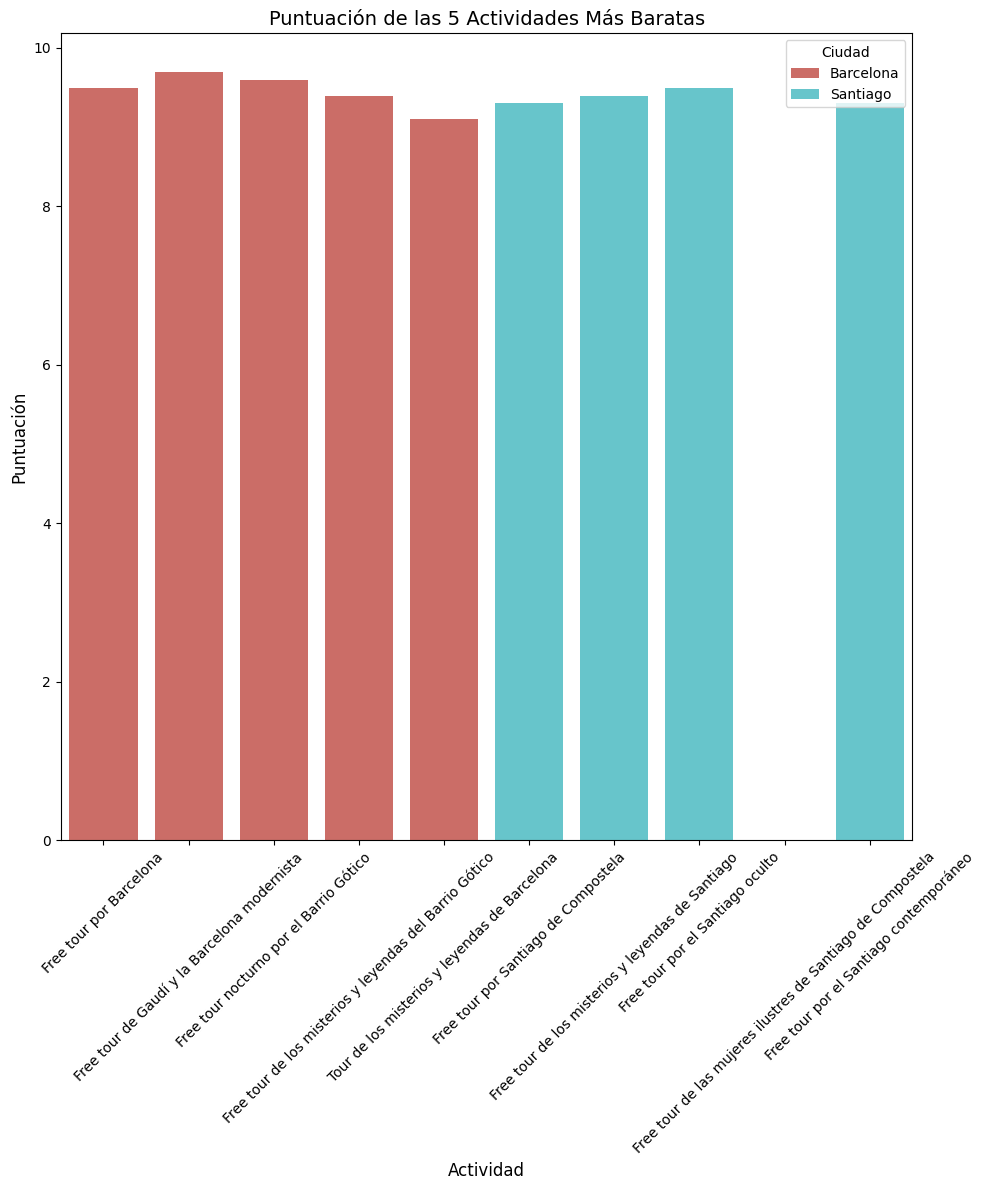

In [93]:
# Visualización de la comparativa de puntuaciones de las 5 actividades más baratas
plt.figure(figsize=(10, 12))
sns.barplot(x='Nombre', y='Puntuación', hue='Ciudad', data=df_top_5_baratas, palette="hls")

plt.title('Puntuación de las 5 Actividades Más Baratas', fontsize=14)
plt.ylabel('Puntuación', fontsize=12)
plt.xlabel('Actividad', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

En este aspecto también gana Barcelona, sus actividades más baratas tienen mejor puntuación que las más baratas de Santiago

Pasamos a analizar los hoteles de ambas ciudades

In [96]:
df_hoteles_barcelona.head()

,nombre,numero_reviews,rating,precio_medio_por noche,ciudad,servicios,link
0,Hostemplo Sagrada Familia,448,4.0,166.5,Barcelona,['Free Wifi'],https://www.tripadvisor.com/Hotel_Review-g1874...
1,Andante Hotel,2818,4.5,195.5,Barcelona,"['Free Wifi', 'Pool', 'Outdoor pool', 'Fitness...",https://www.tripadvisor.com/Hotel_Review-g1874...
2,Hyatt Regency Barcelona Tower,3567,4.5,241.0,Barcelona,"['Free Wifi', 'Pool', 'Heated pool', 'Indoor p...",https://www.tripadvisor.com/Hotel_Review-g1874...
3,Hotel Astoria,1901,4.5,175.5,Barcelona,"['Free Wifi', 'Pool', 'Outdoor pool', 'Restaur...",https://www.tripadvisor.com/Hotel_Review-g1874...
4,Majestic Hotel & Spa Barcelona,4263,4.5,446.0,Barcelona,"['Free Wifi', 'Pool', 'Outdoor pool', 'Restaur...",https://www.tripadvisor.com/Hotel_Review-g1874...


In [97]:
df_hoteles_santiago.head()

,nombre,numero_reviews,rating,precio_medio_por noche,ciudad,servicios,link
0,Hotel Spa Relais & Chateaux A Quinta da Auga,1116,4.5,252.0,Santiago de Compostela,"['Free Wifi', 'Free parking', 'Breakfast inclu...",https://www.tripadvisor.com/Hotel_Review-g1875...
1,Hotel Compostela,764,4.0,124.0,Santiago de Compostela,"['Free Wifi', 'Room service', 'Bar/Lounge']",https://www.tripadvisor.com/Hotel_Review-g1875...
2,Hotel Restaurante Asador De Roxos Casa Albardo...,233,4.5,91.0,Santiago de Compostela,"['Free Wifi', 'Free parking', 'Breakfast inclu...",https://www.tripadvisor.com/Hotel_Review-g1870...
3,Gran Hotel Los Abetos,808,4.5,135.5,Santiago de Compostela,"['Free Wifi', 'Free parking', 'Outdoor pool', ...",https://www.tripadvisor.com/Hotel_Review-g1875...
4,Casa Grande do Bachao,431,5.0,120.5,Santiago de Compostela,"['Free parking', 'Pool', 'Outdoor pool', 'Rest...",https://www.tripadvisor.com/Hotel_Review-g1875...


Comparamos el rating promedio de los hoteles de ambas ciuadades

In [100]:
# Calculamos el rating medio
rating_promedio_barcelona = df_hoteles_barcelona['rating'].mean()
rating_promedio_santiago = df_hoteles_santiago['rating'].mean()

# Crear mosun DataFrame con los ratings promedios
df_ratings_promedio = pd.DataFrame({
    'Ciudad': ['Barcelona', 'Santiago'],
    'Rating Promedio': [rating_promedio_barcelona, rating_promedio_santiago]
})

df_ratings_promedio


,Ciudad,Rating Promedio
0,Barcelona,4.306452
1,Santiago,4.102941


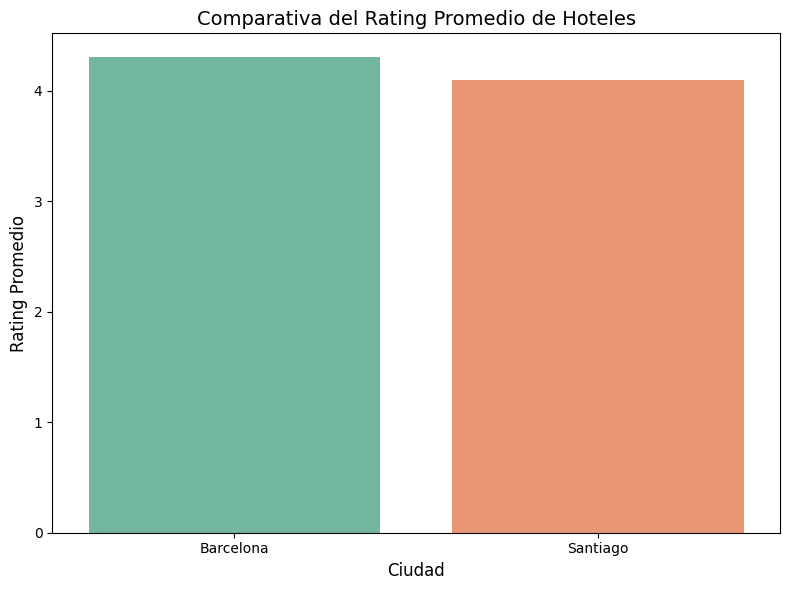

In [99]:
# Visualización con seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Ciudad', y='Rating Promedio', data=df_ratings_promedio, palette="Set2")

# Añadir etiquetas y título
plt.title('Comparativa del Rating Promedio de Hoteles', fontsize=14)
plt.ylabel('Rating Promedio', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Observamos que de media los hoteles de Barcelona tienen mejor rating que los de Santiago.

Comparemos la media de los precios de los hoteles

In [101]:
# Calcular el precio promedio por ciudad
precio_promedio_barcelona = df_hoteles_barcelona['precio_medio_por noche'].mean()
precio_promedio_santiago = df_hoteles_santiago['precio_medio_por noche'].mean()

# Crear un DataFrame con los precios promedio
df_precio_promedio = pd.DataFrame({
    'Ciudad': ['Barcelona', 'Santiago'],
    'Precio Promedio': [precio_promedio_barcelona, precio_promedio_santiago]
})

df_precio_promedio



,Ciudad,Precio Promedio
0,Barcelona,218.387097
1,Santiago,107.941176


In [ ]:
diferencia_precio_promedio = precio_promedio_barcelona - precio_promedio_santiago
print("Las actividades de Barcelona son de media más caras que las de Santiago, la diferencia es: ", diferencia_precio, "euros")

In [ ]:
# Visualización de los precios promedio
plt.figure(figsize=(8, 6))
sns.barplot(x='Ciudad', y='Precio Promedio', data=df_precio_promedio, palette="Set2")

# Añadir etiquetas y título
plt.title('Precio Promedio de Hoteles por Ciudad', fontsize=14)
plt.ylabel('Precio Promedio (€)', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()